In [1]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
beta = 1  #β
f = 8     #f
gamma = 1 #γ

In [3]:
psi = [1.5] #ψ
omega = [0] #ω
phi = [0]   #φ

$$
{F_{resistance}}_n = -b {\omega};\quad \\
{F_{gravity}}_n = -mg \sin \psi;\quad \\
{F_{periodic}}_n = F \cos \Omega t
$$

$$
{\omega}_0^2 = \frac{k}{m};\quad \beta = \frac{b}{m {\omega}_0};\quad f = \frac{F}{m {\omega}_0^2};\quad \gamma = \frac{\Omega}{{\omega}_0}
$$

$$
\tau = {\omega}_0t;\quad \overset{\circ}{x} = \frac{dx}{d\tau}
$$

$$
\begin{cases}
\overset{\circ}{\psi} = \omega, \\
\overset{\circ}{\omega} = -\beta \omega - \sin \psi + f \cos \phi, \\
\overset{\circ}{\phi} = \gamma, \quad \phi \mod 2\pi
\end{cases}
$$

In [4]:
dtau = 2e-3
tau_end = 100
tau = [0]
for tau_now in tqdm.tqdm(np.arange(0, tau_end + dtau, dtau)):
    psi.append(psi[-1] + omega[-1] * dtau)
    omega.append(omega[-1] + (-beta * omega[-1] - np.sin(psi[-1]) + f * np.cos(phi[-1])) * dtau)
    phi.append((phi[-1] + gamma * dtau) % (np.pi * 2))
    tau.append(tau_now)

100%|██████████| 50001/50001 [00:00<00:00, 429405.29it/s]


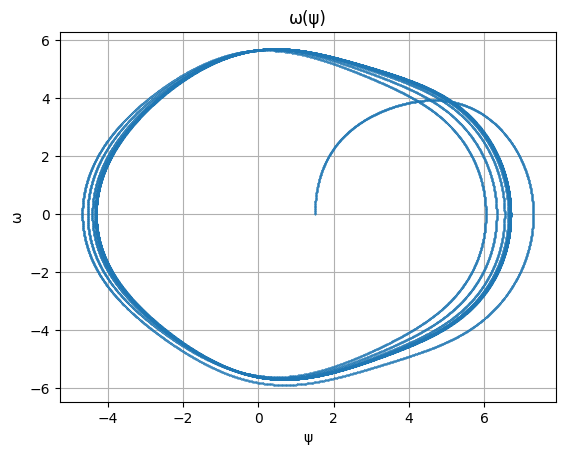

In [5]:
plt.plot(psi, omega, linestyle='', marker='.', markersize=0.5)
plt.title('ω(ψ)')
plt.xlabel('ψ')
plt.ylabel('ω')
plt.grid()

Text(0.5, 0, 'φ')

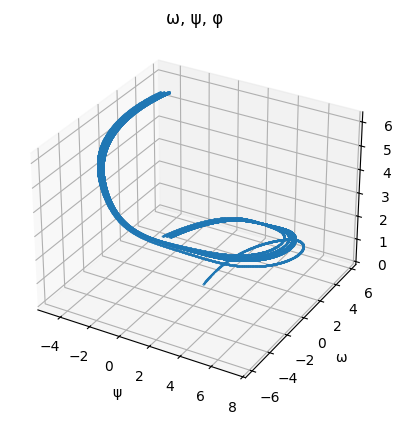

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(psi, omega, phi, linestyle='', marker='.', markersize=0.5)
plt.title('ω, ψ, φ')
ax.set_xlabel('ψ')
ax.set_ylabel('ω')
ax.set_zlabel('φ')

In [7]:
df = pd.DataFrame(
    {
        'ψ': psi,
        'ω': omega,
        'φ': phi,
    }
)
fig = px.line_3d(df, x='ψ', y='ω', z='φ')
fig.show()

In [8]:
psi_space = np.arange(-np.pi, np.pi, 5e-2)
omega_space = np.arange(-np.pi, np.pi, 5e-2)
phi_fixed = 0

init_dots = []
for psi in psi_space:
    for omega in omega_space:
        init_dots.append((psi, omega))

In [9]:
def find_next_state(psi, omega):
    global dt
    psi = [psi, psi]
    omega = [omega, omega]
    phi = [phi_fixed, phi_fixed]
    while not (phi[-2] < (phi_fixed + 2 * np.pi) and phi[-1] >= (phi_fixed + 2 * np.pi)):
        psi.append(psi[-1] + omega[-1] * dtau)
        omega.append(omega[-1] + (-beta * omega[-1] - np.sin(psi[-1]) + f * np.cos(phi[-1])) * dtau)
        phi.append(phi[-1] + gamma * dtau)
    return psi[-1], omega[-1]

In [10]:
next_psi_dots = {
    'ψ': [],
    'ω': [],
    'next ψ': [],
}

next_omega_dots = {
    'ψ': [],
    'ω': [],
    'next ω': [],
}

for dot in tqdm.tqdm(init_dots):
    next_psi, next_omega = find_next_state(*dot)

    next_psi_dots['ψ'].append(dot[0])
    next_psi_dots['ω'].append(dot[1])
    next_psi_dots['next ψ'].append(next_psi)

    next_omega_dots['ψ'].append(dot[0])
    next_omega_dots['ω'].append(dot[1])
    next_omega_dots['next ω'].append(next_omega)

100%|██████████| 15876/15876 [01:08<00:00, 233.05it/s]


Text(0.5, 0, 'next ψ')

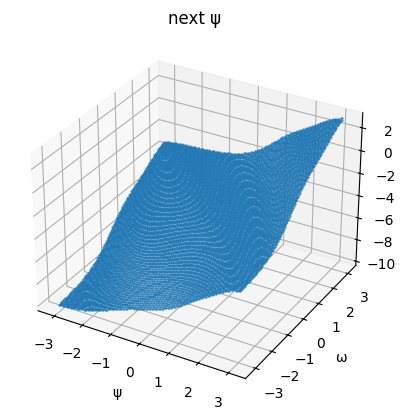

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(next_psi_dots['ψ'], next_psi_dots['ω'], next_psi_dots['next ψ'], linestyle='', marker='.', markersize=1)
plt.title('next ψ')
ax.set_xlabel('ψ')
ax.set_ylabel('ω')
ax.set_zlabel('next ψ')

In [12]:
fig = px.scatter_3d(pd.DataFrame(next_psi_dots), x='ψ', y='ω', z='next ψ')
fig.update_traces(marker=dict(size=1))
fig.show()

Text(0.5, 0, 'next ω')

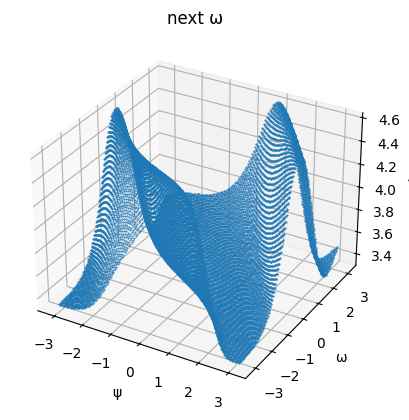

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(next_omega_dots['ψ'], next_omega_dots['ω'], next_omega_dots['next ω'], linestyle='', marker='.', markersize=1)
plt.title('next ω')
ax.set_xlabel('ψ')
ax.set_ylabel('ω')
ax.set_zlabel('next ω')

In [14]:
fig = px.scatter_3d(pd.DataFrame(next_omega_dots), x='ψ', y='ω', z='next ω')
fig.update_traces(marker=dict(size=1))
fig.show()

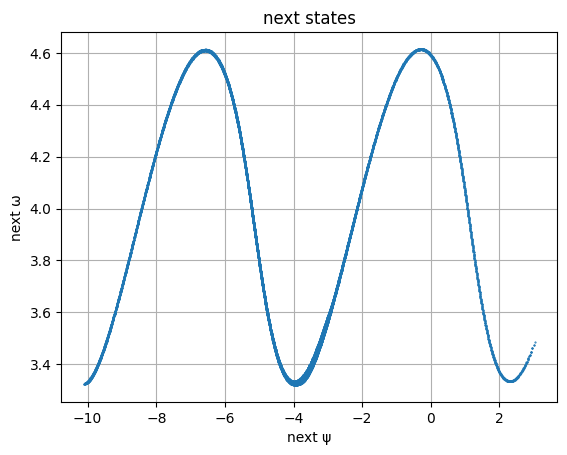

In [15]:
plt.plot(next_psi_dots['next ψ'], next_omega_dots['next ω'], linestyle='', marker='.', markersize=1)
plt.title('next states')
plt.xlabel('next ψ')
plt.ylabel('next ω')
plt.grid()

In [16]:
psi_space = np.arange(-np.pi, np.pi, 4e-1)
omega_space = np.arange(-2 * np.pi, 2 * np.pi, 4e-1)
phi_fixed = 0

init_dots = []
for psi in psi_space:
    for omega in omega_space:
        init_dots.append((psi, omega))

100%|██████████| 512/512 [00:02<00:00, 173.94it/s]


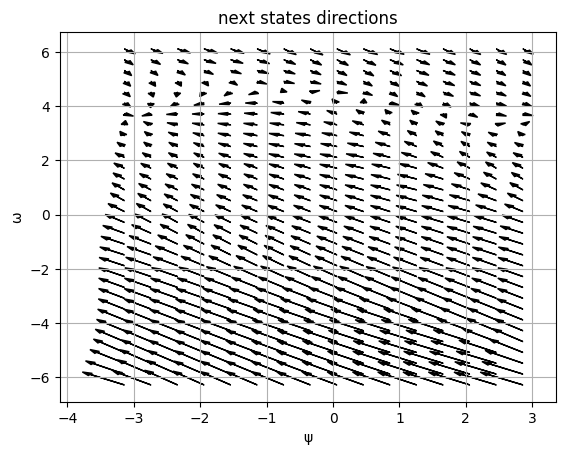

In [17]:
next_psi_dots = {
    'ψ': [],
    'ω': [],
    'next ψ': [],
}

next_omega_dots = {
    'ψ': [],
    'ω': [],
    'next ω': [],
}

for dot in tqdm.tqdm(init_dots):
    next_psi, next_omega = find_next_state(*dot)

    next_psi_dots['ψ'].append(dot[0])
    next_psi_dots['ω'].append(dot[1])
    next_psi_dots['next ψ'].append(next_psi)

    next_omega_dots['ψ'].append(dot[0])
    next_omega_dots['ω'].append(dot[1])
    next_omega_dots['next ω'].append(next_omega)

    plt.arrow(dot[0], dot[1], (next_psi - dot[0]) * 0.04, (next_omega - dot[1]) * 0.04, head_width=0.1, head_length=0.15, width=0.001, fc='k', ec='k')

plt.title('next states directions')
plt.xlabel('ψ')
plt.ylabel('ω')
plt.grid()